<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Homework-Low_Pass-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low-pass filter
Here is a simple electronic circuit with one resistor and one capacitor:

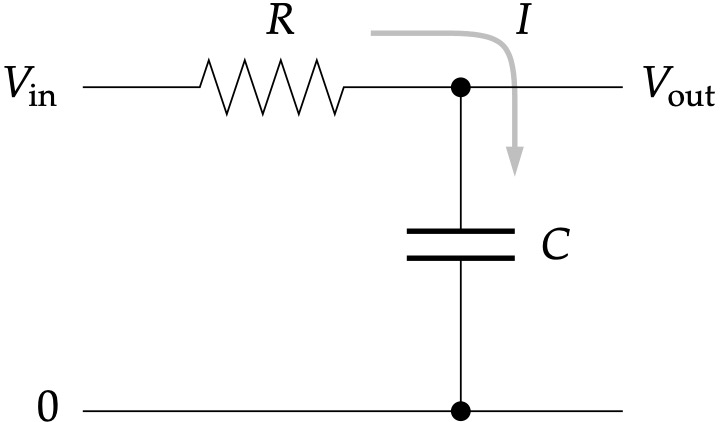


This circuit acts as a low-pass filter: you send a signal in on the left
and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has
very high impedance, so that a negligible amount of current flows through
it, we can write down the equations governing this circuit as follows.  Let
$I$ be the current that flows through $R$ and into the capacitor, and let
$Q$ be the charge on the capacitor.  Then:

$IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = \frac{dQ}{dt}$

Substituting the second equation into the third, then substituting the
result into the first equation, we find that 

$ V_\textrm{in} -V_\textrm{out} = RC\left(d V_\textrm{out}/d t\right)$, or equivalently

$\frac{d V_\textrm{out}}{dt} = \frac{1}{RC}\left(V_\textrm{in} -V_\textrm{out}\right)$

##A.
Write a program (or modify a previous one) to solve this equation for
  $V_\textrm{out}(t)$ when
  the input signal is a square-wave with frequency 1 and amplitude 1 using:

$
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
$

where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer.
Use the program to make plots of the output of the filter circuit from
$t=0$ to $t=10$ when $RC=0.01$, $0.1$, 1, and 10, with initial
condition of $V_\textrm{out}(0)=0$.  You will have to make a decision about
what value of $h$ to use in your calculation.  Small values give more
accurate results, but the program will take longer to run.  Try a variety
of different values and choose one for your final calculations that seems
sensible to you.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

User defined parameters

In [ ]:
start = 0.0
end = 10.0
Vout_0 = 0.0
t_0 = 0.0
RC_values = np.array([0.01, 0.1, 1, 10.0])
h = .01

Define our function for the lowpass filter

In [ ]:
def f(V,T,RC):
  if np.floor(T)%2 == 0:
    Vin =  1.0
  if np.floor(T)%2 == 1:
    Vin = -1.0
  return (Vin-V)/RC

Now perform Euler's method on this 

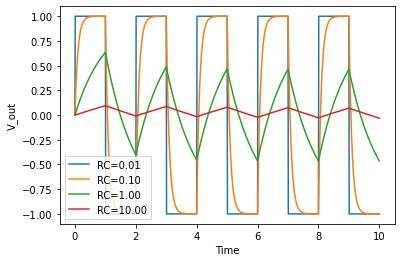

In [ ]:
for RC in RC_values:
  N = int((end-start)/h) +1 #determine how many points I need/. I'm adding 1 to make sure I get both the start and end times
  Vout = np.zeros(N) #define an array for my x values.  Initially set everything to 0.
  t = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
  Vout[0] = Vout_0 #set our initial condition 
  t[0] = t_0 #set our initial condition (not strictly necessary in this case since t at 0 is 0, but still good to do)
  for n in range(N-1):
    t[n+1] = h * (n+1)
    Vout[n+1] = Vout[n] + h*f(Vout[n],t[n],RC)
  plt.plot(t,Vout,label='RC=%4.2f'%RC)
plt.legend(loc='lower left')
plt.xlabel("Time")
plt.ylabel("V_out")
plt.show()

##B.
Based on the graphs produced by your program, describe what you see
  and explain what the circuit is doing.


A program similar to the one you wrote is running inside most stereos and
music players, to create the effect of the "bass" control.  In the old
days, the bass control on a stereo would have been connected to a real
electronic low-pass filter in the amplifier circuitry, but these days there
is just a computer processor that simulates the behavior of the filter in a
manner similar to your program.


What the low-pass filter is doing is that its allowing the signal to go through IF it is below the value specified by 1/RC (note that 1/RC is a frequency since RC is a time).  Note that for an RC value of 0.01 the signal passes as if its just a step function (it's almost like the RC part isn't there at all).  If RC is large (such as 10.0), then it basically cuts out the signal.  Between those extremes there is a range of behaviors as the system transitions from allowing the low frequency signal through unaltered to dampening it.

# Grading (30 points)

* 10 points: Did you write easy to read code that is well documented, including variable names that make sense?
* 10 points: Does your code produce the correct results?
* 5 points: Is the plot you generated in part a easy to read with properly labeled axis?
* 5 points: Does your explanation in part b discuss what the circuit is doing?